In [1]:
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly

import dash
import dash_core_components as dcc
import dash_html_components as html

from dash.dependencies import Input, Output

C:\Users\juled\AppData\Local\Temp\ipykernel_26516\1595372032.py:13: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\juled\AppData\Local\Temp\ipykernel_26516\1595372032.py:14: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
mpl.rcParams['figure.figsize'] = (20, 16)
pd.set_option('display.max.rows',500)
sns.set(style='darkgrid')

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Explorative Data Analysis

* Focus is often a visual representation of the data

In [3]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv', sep=';')
df_plot.sort_values('date',ascending=False).head()
df_plot.head()

,date,Albania,Egypt,Germany,Italy,Spain,United Kingdom,US
0,2020-01-22,0,0,0,0,0,0,1
1,2020-01-23,0,0,0,0,0,0,1
2,2020-01-24,0,0,0,0,0,0,2
3,2020-01-25,0,0,0,0,0,0,2
4,2020-01-26,0,0,0,0,0,0,5


<Figure size 1440x1152 with 0 Axes>

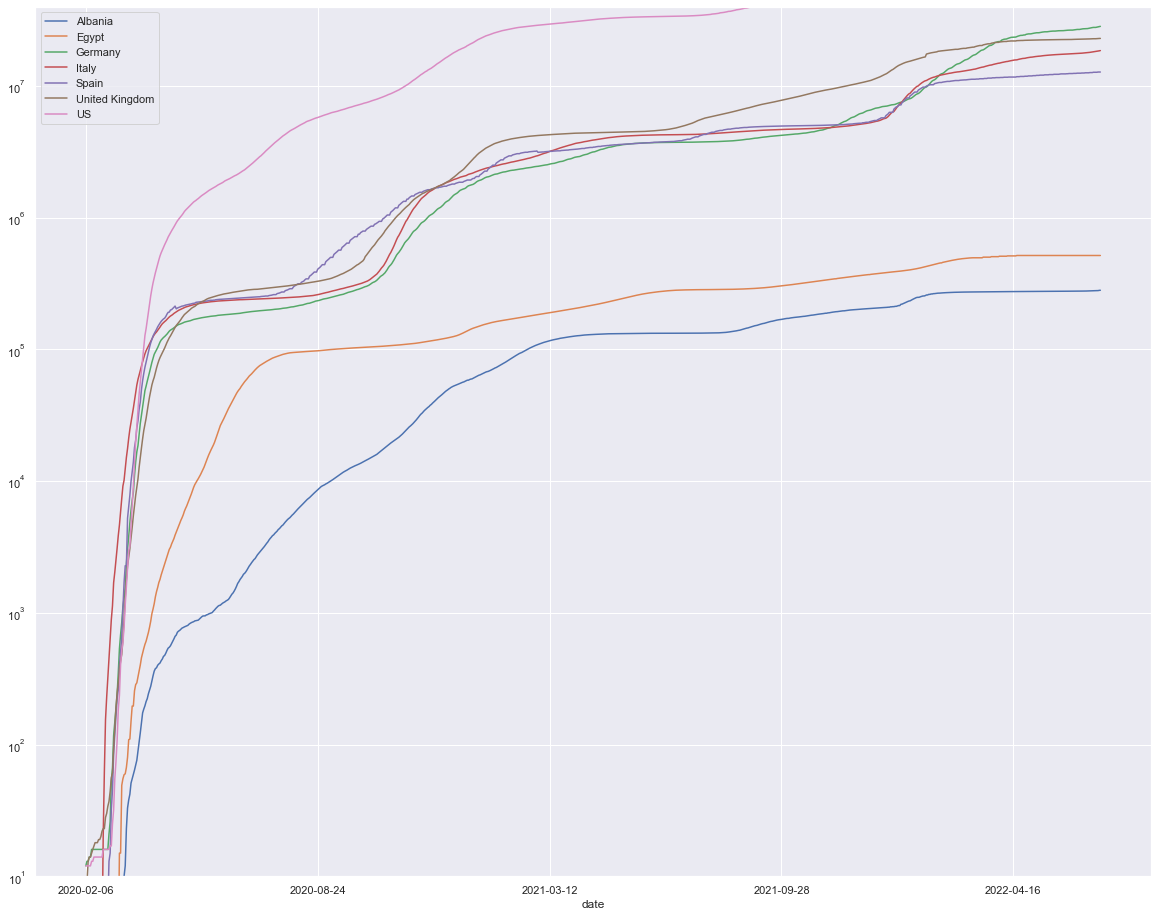

In [4]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 40000000)
ax.set_yscale('log')

### Plot.ly

In [5]:
fig = go.Figure()
country_list=['Albania',
              'Egypt',
              'Germany',
              'Italy',
              'Spain',
              'United Kingdom',
              'US',
             ]

for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                         y=df_plot[each],
                         mode='markers+lines',
                         opacity=0.8,
                         line_width =2,
                         marker_size=4,    
                         name = each )
             )

fig.update_layout(autosize=True,
    width=1024,
    height=768,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source John's Jopkins case, log-scale)",
)
fig.update_yaxes(type="log") #range=[1.1,8.8])
fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color= "#7f7f7f")
                )

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show(renderer='browser')

In [6]:
app = dash.Dash()
app.layout = html.Div([
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Albania', 'value': 'Albania'},
            {'label': 'Egypt', 'value': 'Egypt'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'United Kingdom', 'value': 'United Kingdom'},
            {'label': 'US', 'value': 'US'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),  
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [7]:
@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                          )
        )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
            )
    }      


In [8]:
app.run_server(debug=True, use_reloader=False) # Turn off reloader inside Jupyter

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
